In [1]:
#Standard python imports
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Stats imports
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import statsmodels.stats.multicomp as mc
import scipy.stats as stats

#random seed for replicability
np.random.seed(seed=42)

In [2]:
atl_df = pd.read_csv('../data/atl_df_cleaned.csv')
bos_df = pd.read_csv('../data/bos_df_cleaned.csv')
chi_df = pd.read_csv('../data/chi_df_cleaned.csv')
den_df = pd.read_csv('../data/bos_df_cleaned.csv')

In [3]:
#Subsetting each cities accident data to those of interest for our problem statement
#Week 10 is the week before the time change
#Week 11 is the week of the time change
#Week 12 is the week after the time change
atl_df_spring_dst = atl_df[(atl_df['week'] == 10) | (atl_df['week'] == 11) | (atl_df['week'] == 12)]
bos_df_spring_dst = bos_df[(bos_df['week'] == 10) | (bos_df['week'] == 11) | (bos_df['week'] == 12)]
chi_df_spring_dst = chi_df[(chi_df['week'] == 10) | (chi_df['week'] == 11) | (chi_df['week'] == 12)]
den_df_spring_dst = den_df[(den_df['week'] == 10) | (den_df['week'] == 11) | (den_df['week'] == 12)]

In [4]:
#Double check that the spring DST dataframes were created correctly
print(atl_df_spring_dst['week'].value_counts())
print(bos_df_spring_dst['week'].value_counts())
print(chi_df_spring_dst['week'].value_counts())
print(den_df_spring_dst['week'].value_counts())

10    467
12    430
11    362
Name: week, dtype: int64
12    301
11    273
10    196
Name: week, dtype: int64
11    918
12    714
10    540
Name: week, dtype: int64
12    301
11    273
10    196
Name: week, dtype: int64


In [5]:
#Subsetting each cities accident data to those of interest for our problem statement
#Week 44 is the week before the time change
#Week 45 is the week of the time change
#Week 46 is the week after the time change
atl_df_fall_dst = atl_df[(atl_df['week'] == 44) | (atl_df['week'] == 45) | (atl_df['week'] == 46)]
bos_df_fall_dst = bos_df[(bos_df['week'] == 44) | (bos_df['week'] == 45) | (bos_df['week'] == 46)]
chi_df_fall_dst = chi_df[(chi_df['week'] == 44) | (chi_df['week'] == 45) | (chi_df['week'] == 46)]
den_df_fall_dst = den_df[(den_df['week'] == 44) | (den_df['week'] == 45) | (den_df['week'] == 46)]

In [6]:
#Double check that the spring DST dataframes were created correctly
print(atl_df_fall_dst['week'].value_counts())
print(bos_df_fall_dst['week'].value_counts())
print(chi_df_fall_dst['week'].value_counts())
print(den_df_fall_dst['week'].value_counts())

44    671
45    642
46    635
Name: week, dtype: int64
45    261
46    233
44    205
Name: week, dtype: int64
45    889
44    859
46    721
Name: week, dtype: int64
45    261
46    233
44    205
Name: week, dtype: int64


In [7]:
#Combined dataframe of all spring DST accident data 
spr_dst_comb_df = pd.concat([atl_df_spring_dst, bos_df_spring_dst, chi_df_spring_dst, den_df_spring_dst])
spr_dst_comb_df['week'].value_counts()

11    1826
12    1746
10    1399
Name: week, dtype: int64

In [8]:
#Combined dataframe of all Fall DST accident data 
fall_dst_comb_df = pd.concat([atl_df_fall_dst, bos_df_fall_dst, chi_df_fall_dst, den_df_fall_dst])
fall_dst_comb_df['week'].value_counts()

45    2053
44    1940
46    1822
Name: week, dtype: int64

## ANOVA on severity of accidents for Spring DST Time Change

Equivalent Research Hypotheses were used as those used for the initial Chicago analysis to test the impact of the spring time change and fall time change. For further explanation please reference notebook 5_hypothesis_test_chicago.

In [9]:
#I (CH) referenced this article for a refresher on ANOVA and to find the libraries to use for each test
#https://www.pythonfordatascience.org/anova-python/#anova-test
#I referenced these pages for a refresher on ANOVA vs. Kruskall-Wallis and the impact of a non-normal distribution
# https://stats.stackexchange.com/questions/76059/difference-between-anova-and-kruskal-wallis-test
# http://www.biostathandbook.com/kruskalwallis.html

In [10]:
#Overall comparison of week before, week of DST, and week after DST for traffic accidents in chicago
stats.f_oneway(spr_dst_comb_df['severity'][spr_dst_comb_df['week'] == 10],
              spr_dst_comb_df['severity'][spr_dst_comb_df['week'] == 11],
              spr_dst_comb_df['severity'][spr_dst_comb_df['week'] == 12])

F_onewayResult(statistic=7.9157344051453835, pvalue=0.00036957803620512523)

In [11]:
comb_spr_anova = ols("severity ~C(week)", data=spr_dst_comb_df).fit()
comb_aov_table = sm.stats.anova_lm(comb_spr_anova, typ=2)
comb_aov_table

,sum_sq,df,F,PR(>F)
C(week),7.780420,2.0,7.915734,0.00037
Residual,2441.537625,4968.0,NaN,NaN


In [12]:
#Shapiro test of normality, failed as the severity of accidents is not normally distributed
stats.shapiro(comb_spr_anova.resid)

ShapiroResult(statistic=0.8242663145065308, pvalue=0.0)

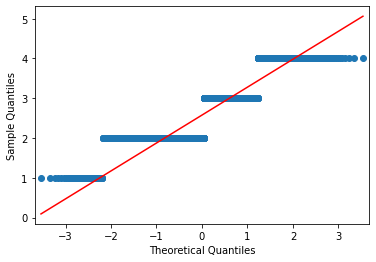

In [13]:
#QQ plot to conform lack of normality
sm.qqplot(spr_dst_comb_df['severity'], line='s');

In [14]:
#Levene's test of homogeneity
#Non-significant result
stats.levene(spr_dst_comb_df['severity'][spr_dst_comb_df['week'] == 10],
              spr_dst_comb_df['severity'][spr_dst_comb_df['week'] == 11],
              spr_dst_comb_df['severity'][spr_dst_comb_df['week'] == 12])

LeveneResult(statistic=2.1533940455338954, pvalue=0.11619782067192008)

In [15]:
#Kruskal-Wallis
stats.kruskal(spr_dst_comb_df['severity'][spr_dst_comb_df['week'] == 10],
              spr_dst_comb_df['severity'][spr_dst_comb_df['week'] == 11],
              spr_dst_comb_df['severity'][spr_dst_comb_df['week'] == 12])

KruskalResult(statistic=8.567155479080224, pvalue=0.013793225135992192)

In [16]:
#Hand calculation of the eta squared effect size metric
eta_square = comb_aov_table[:-1]['sum_sq'] / sum(comb_aov_table['sum_sq'])
eta_square

C(week)    0.003177
Name: sum_sq, dtype: float64

### Interpretation
* The results of the above ANOVA and Kruskal-Wallis tests on accident severity for the spring time change show strong  evidence for statistical significance as both p-values (KW = 0.0138, ANOVA = 0.00037) are smaller then our alpha of 0.05. 
* Given this we can reject our null hypothesis and state that there is a statistically significant difference in the average severity of accidents for all cities during the weeks before, during, and after the fall time change.
* In addition to the ANOVA and Kruskal-Wallis we also calculated the Eta squared effect size, finding that the effect of the difference found was of a small size at eta = 0.003177.

In [17]:
#Updating the weeks to wording of week before, of, after for ease of table reading.
spr_dst_comb_df['week'] = spr_dst_comb_df.week.map({10 : 'Week Before', 11 : 'Week of DST', 12: 'Week After'})
spr_dst_comb_df['week'].value_counts()

Week of DST    1826
Week After     1746
Week Before    1399
Name: week, dtype: int64

## Multiple Comparison Tests

### Tukey Honestly Significant Difference (HSD) Test

In [18]:
comp = mc.MultiComparison(spr_dst_comb_df['severity'], spr_dst_comb_df['week'])
post_hoc = comp.tukeyhsd()
post_hoc.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Week After,Week Before,0.0961,0.001,0.0371,0.1551,True
Week After,Week of DST,0.0657,0.0142,0.0107,0.1207,True
Week Before,Week of DST,-0.0304,0.4426,-0.0888,0.028,False


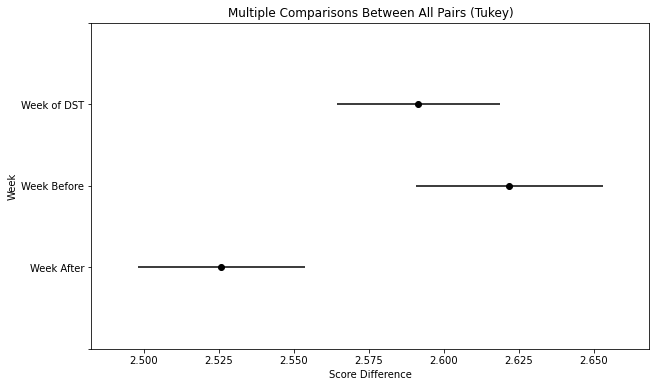

In [19]:
post_hoc.plot_simultaneous(ylabel='Week', xlabel='Score Difference');

### Bonferroni Correction

In [20]:
tbl, a1, a2 = comp.allpairtest(stats.ttest_ind, method='bonf')
tbl

group1,group2,stat,pval,pval_corr,reject
Week After,Week Before,-3.7962,0.0001,0.0004,True
Week After,Week of DST,-2.8516,0.0044,0.0131,True
Week Before,Week of DST,1.2044,0.2285,0.6856,False


### Sidak Correction 

In [21]:
tbl, a1, a2 = comp.allpairtest(stats.ttest_ind, method='sidak')
tbl

group1,group2,stat,pval,pval_corr,reject
Week After,Week Before,-3.7962,0.0001,0.0004,True
Week After,Week of DST,-2.8516,0.0044,0.0131,True
Week Before,Week of DST,1.2044,0.2285,0.5408,False


''

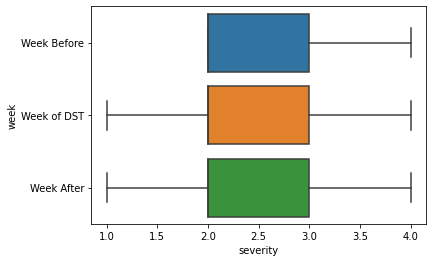

In [22]:
sns.boxplot(x=spr_dst_comb_df['severity'], y=spr_dst_comb_df['week'])
;

### Interpretation
* Based on the results from each multiple comparisons test we can see that there is a significant difference in severity score between:
    1. the week before DST and the week after DST, with higher severity in the week before DST
    1. and the week of DST and the week after DST, with higher severity in the week of DST.
* The second comparison result suggests that the spring time change may lead to higher accident severity in the week of the time change when compared to the week after it. 
* For practical purposes this can be interpreted as evidence that the hour lost may lead to more severe accidents in the days after the time change. Moving to a standard time that does not involve this spring shift forward and the ensuing loss of an hour for it may likely get rid of this increase in accident severity.

## ANOVA on Severity of Accidents for the Fall DST Time Change

In [23]:
#Fall DST Time Change ANOVA
stats.f_oneway(fall_dst_comb_df['severity'][fall_dst_comb_df['week'] == 44],
              fall_dst_comb_df['severity'][fall_dst_comb_df['week'] == 45],
              fall_dst_comb_df['severity'][fall_dst_comb_df['week'] == 46])

F_onewayResult(statistic=5.735146412394159, pvalue=0.003248718921727932)

In [24]:
comb_fall_anova = ols("severity ~C(week)", data=fall_dst_comb_df).fit()
comb_fall_aov_table = sm.stats.anova_lm(comb_fall_anova, typ=2)
comb_fall_aov_table

,sum_sq,df,F,PR(>F)
C(week),4.948554,2.0,5.735146,0.003249
Residual,2507.433218,5812.0,NaN,NaN


In [25]:
stats.kruskal(fall_dst_comb_df['severity'][fall_dst_comb_df['week'] == 44],
              fall_dst_comb_df['severity'][fall_dst_comb_df['week'] == 45],
              fall_dst_comb_df['severity'][fall_dst_comb_df['week'] == 46])

KruskalResult(statistic=12.426038647133936, pvalue=0.002003180075253317)

In [26]:
eta_square = comb_fall_aov_table[:-1]['sum_sq'] / sum(comb_fall_aov_table['sum_sq'])
eta_square

C(week)    0.00197
Name: sum_sq, dtype: float64

### Interpretation
* The results of the above ANOVA and Kruskal-Wallis tests on accident severity for the fall time change show strong  evidence for statistical significance as both p-values (KW = 0.0138, ANOVA = 0.00037) are smaller then our alpha of 0.05. 
* Given this we can reject our null hypothesis and state that there is a statistically significant difference in the average severity of accidents in Chicago during the weeks before, during, and after the fall time change.
* In addition to the ANOVA and Kruskal-Wallis we also calculated the Eta squared effect size, finding that the effect of the difference found was of a small size at eta = 0.00197.

### Multiple Comparisons Test

In [27]:
#Updating the weeks to wording of week before, of, after for ease of table reading.
fall_dst_comb_df['week'] = fall_dst_comb_df.week.map({44 : 'Week Before', 45 : 'Week of DST', 46: 'Week After'})
fall_dst_comb_df['week'].value_counts()

Week of DST    2053
Week Before    1940
Week After     1822
Name: week, dtype: int64

In [28]:
comp = mc.MultiComparison(fall_dst_comb_df['severity'], fall_dst_comb_df['week'],
                         group_order=['Week Before', 'Week of DST', 'Week After'])
post_hoc = comp.tukeyhsd()
post_hoc.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Week Before,Week of DST,-0.0701,0.0022,-0.1189,-0.0214,True
Week Before,Week After,-0.0421,0.1215,-0.0923,0.0082,False
Week of DST,Week After,0.028,0.3822,-0.0215,0.0776,False


### Interpretation
* Based on the results from the multiple comparisons test we can see that there is a significant difference in severity score between:
    1. the week before DST and the week of DST, with higher severity in the week before the time change
* These results suggests that the fall time change may lead to a decrease in accident severity in the week of the time change when compared to the week before it, as most people gain an hour of sleep.